<a href="https://colab.research.google.com/github/Phonchanit/Data_Warehouse/blob/main/Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: หมูกระทะ 3 โล

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. น.ส. ปีย์รดา ภู่ถนนนอก 653020211-6
2. น.ส. พรชนิตว์ เหล่าโยธี 653020212-4
3. น.ส. นิธินันต์ ศรีกงพาน 653020572-4

กำหนดส่ง: พุธ 18 กันยายน 2567 \
รายงานในชั้นเรียน: พฤหัสบดี 19 กันยายน 2567

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [3]:
"""
หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip3 install numpy
!pip install nltk
!pip3 install wordcloud
"""
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request
import requests

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file
จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```
หมายเหตุ: ไม่ต้องนำเสนอข้อนี้

#### Read JSON file

In [4]:
# ----------------- Your code here -----------------
with open('thailand_tweets.txt', 'r', encoding='utf-8') as file:
    data = json.load(file)

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [5]:
pprint.pprint(data)

('{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": '
 '"matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": '
 '"https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, '
 '"likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", '
 '"content": "Thanks for asking! Yes, we will support shipping to most '
 'countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], '
 '"images": [], "videos": [], "tweet_url": '
 '"https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, '
 '"1564764866598080513": {"tweet_id": "1564764866598080513", "username": '
 '"DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": '
 '"https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, '
 '"likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", '
 '"content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography '
 '\\n@tombraider\\n @crystaldynamics", "hashtag

#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data:
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [6]:
# 2.1
total_tweets = len(data)
print(f'Total number of tweets: {total_tweets}')

Total number of tweets: 18558


In [7]:
# 2.2
# Pretty print the first tweet
# Convert the JSON string to a dictionary
import json
data = json.loads(data)

first_tweet_id = list(data.keys())[0]
first_tweet = data[first_tweet_id]

# Call the pprint function from the pprint module
pprint.pprint(first_tweet)

{'content': 'Thanks for asking! Yes, we will support shipping to most '
            'countries, including Japan and Thailand. ',
 'hashtags': [],
 'images': [],
 'is_retweet': False,
 'likes': 7,
 'link': '',
 'mentions': [],
 'name': 'MATT HUNTΞR',
 'posted_time': '2022-08-30T23:59:57+00:00',
 'profile_picture': 'https://twitter.com/matthunter/photo',
 'replies': 2,
 'retweets': 1,
 'tweet_id': '1564764893038882816',
 'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
 'username': 'matthunter',
 'videos': []}


In [8]:
# 2.3
hashtags = first_tweet["hashtags"]
mentions = first_tweet["mentions"]
print(f'Hashtags: {hashtags}')
print(f'Mentions: {mentions}')

Hashtags: []
Mentions: []


In [9]:
# 2.4
thailand_hashtags = []

for tweet in data.values():
    hashtags = tweet["hashtags"]
    if "thailand" in [tag.lower() for tag in hashtags]:
        thailand_hashtags.extend(hashtags)

print(f'All hashtags related to Thailand: {set(thailand_hashtags)}')

All hashtags related to Thailand: {'pattaya', 'thailand', 'Thailand'}


In [10]:
# 2.5
# สร้างรายการสำหรับเก็บค่าความนิยมรวม (retweets + replies + likes)
popularity_scores = []
tweet_ids = []

# คำนวณค่าความนิยมรวมสำหรับแต่ละทวีต
for tweet_id, tweet_info in data.items():
    total_score = tweet_info['retweets'] + tweet_info['replies'] + tweet_info['likes']
    popularity_scores.append(total_score)
    tweet_ids.append(tweet_id)

# เรียงลำดับตามความนิยมมากไปน้อยโดยใช้ np.argsort() [::-1] เพื่อเรียงลำดับจากมากไปน้อย
sorted_indices = np.argsort(popularity_scores)[::-1]

# แสดงทวีตที่มีความนิยมมากที่สุด
print("Most Popular Tweets:")
for idx in sorted_indices[:1]:
    tweet_id = tweet_ids[idx]
    tweet_info = data[tweet_id]
    print(f"Tweet ID: {tweet_info['tweet_id']}")
    print(f"Username: {tweet_info['username']}")
    print(f"Content: {tweet_info['content']}")
    print(f"Retweets: {tweet_info['retweets']}, Replies: {tweet_info['replies']}, Likes: {tweet_info['likes']}")
    print(f"Popularity Score: {popularity_scores[idx]}")

Most Popular Tweets:
Tweet ID: 1564764445825458181
Username: OhmPawatInter
Content: Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/Thailand…
#ohmpawat #ยิ้ม5พันของโอมภวัต
Retweets: 99, Replies: 0, Likes: 143
Popularity Score: 242


In [11]:
# 2.6
print("5 Popular Tweets:")
for idx in sorted_indices[:5]:
    tweet_id = tweet_ids[idx]
    tweet_info = data[tweet_id]
    print(f"Tweet ID: {tweet_info['tweet_id']}")
    print(f"Username: {tweet_info['username']}")
    print(f"Content: {tweet_info['content']}")
    print(f"Retweets: {tweet_info['retweets']}, Replies: {tweet_info['replies']}, Likes: {tweet_info['likes']}")
    print(f"Popularity Score: {popularity_scores[idx]}")
    print("="*80)

5 Popular Tweets:
Tweet ID: 1564764445825458181
Username: OhmPawatInter
Content: Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/Thailand…
#ohmpawat #ยิ้ม5พันของโอมภวัต
Retweets: 99, Replies: 0, Likes: 143
Popularity Score: 242
Tweet ID: 1564762341324992513
Username: Zeepruk_jfc
Content: Can you help me?

tracking number
FMP200001150XX

Does anyone know a shipping company in Thailand that handles this number?
I'm in trouble with no reply even if I contact the caller 

#Zunshine
Retweets: 54, Replies: 2, Likes: 32
Popularity Score: 88
Tweet ID: 1564763729967054848
Username: o_rung_o1
Content: วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding Asian Star Thailand #SDA2022 ให้น้องพีพีแล้วนะคะ 
มาพาน้องไปรับถ้วยรางวัล2ปีซ้อนกันค่ะ
#voteforppkritt 
#ppkritt
Retweets: 28, Replies: 0, Likes: 15
Popularity Score: 43
Tweet ID: 1564764361742110720
Username: nato_tonyo11
Content: Goo

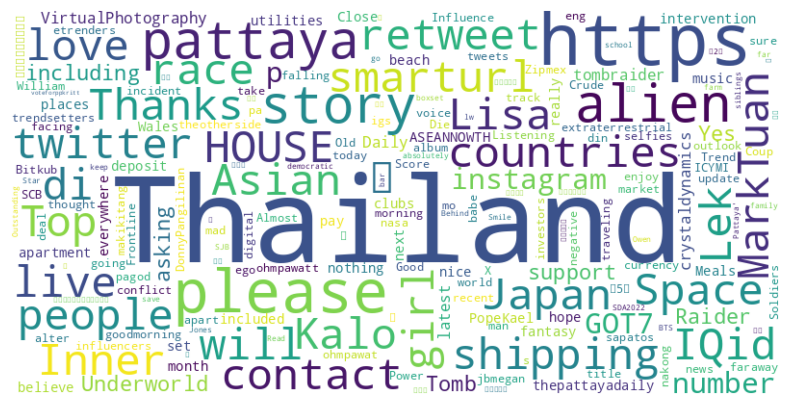

In [12]:
# 2.7
# Collect all the tweet content
tweet_text = " ".join([tweet["content"] for tweet in data.values()])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tweet_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory = "/content/drive/My Drive/Multi_Dataset/Yelp Dataset/"
reviewFilePath = "yelp_academic_dataset_review.json"
businessFilePath = "yelp_academic_dataset_business.json"
userFilePath = "yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [15]:
# We only use the first 100,000 reviews
n = 100000
reviews = []
with open(myDirectory+reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


อ่านข้อมูล business

In [17]:
businesses = []
with open(myDirectory+businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [18]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


อ่านข้อมูล user

In [19]:
users = []
with open(myDirectory+userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [21]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,0,0,0,0,0,0,1,1,0,0
1,PBIeDysdBxwY53IFnOPyUw,mh_-eMZ6K5RLWhZyISBhwA,d_tRshM-w6S4QxE4VVi8tQ,3.0,0,0,0,"Jones is definitely average quality, not many ...",2017-03-05 14:26:14,Jones,...,0,0,0,0,0,0,1,1,0,0
2,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,0,0,0,This is the second time we tried turning point...,2017-05-13 17:06:55,Turning Point of North Wales,...,0,0,0,0,0,0,0,0,0,0
3,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,2,0,1,The place is cute and the staff was very frien...,2017-08-08 00:58:18,Turning Point of North Wales,...,0,0,0,0,1,1,0,0,1,4
4,7iReVDHvucme_cHIHYqmvg,ejFxLGqQcWNLdNByJlIhnQ,0mijbNf-7wiKJ9xto1pAyg,5.0,1,1,1,Best meal in a while! Chef Jen Carroll's new r...,2018-09-29 08:49:24,Spice Finch,...,0,0,0,0,1,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1BVRCPMy8sFLsWqRhBMA6Q,_h3ku94dHfDMlSrvYAwjjw,fPIcpUdc-2Sh2GIs3U07AA,5.0,1,0,0,Came in here and Bought the Resort Series Mona...,2014-08-15 01:29:45,Four Seasons Spa and Pool,...,0,0,0,0,0,0,0,0,0,0
99996,EftiL50cJdnZF5IH3bOPXg,lfGCCQWdxjhNstsE0w1AZQ,DCDngTtKm7ZAOLPvbX0_9g,5.0,0,0,0,Ali and his team always get the job done right...,2017-10-17 11:34:44,American Auto Repair & Getty,...,0,0,0,0,0,0,0,0,0,0
99997,RPWdAWWNlfbAvsDSWWvcfw,haqCShLJpKwjwW8xvw2Rgw,ckz5dDRKVRIX3bdI8KuMzQ,5.0,0,0,0,We rented a table and pirogue for a crawfish b...,2018-04-06 13:39:33,Chaps Party Rental,...,0,0,0,0,0,0,0,0,0,0
99998,e2Qovy06cMXwjRVmgqLI2A,dkMWfuUoXHM1wh-dPZoKHQ,t4sNPmBlDoYwJQD4CnW72Q,5.0,0,0,0,The best pizza I have ever had hands down my f...,2016-04-02 02:59:32,Versato's Pizza,...,0,0,0,0,0,0,0,0,0,0


### ทำการสำรวจข้อมูลเบื้องต้น

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     100000 non-null  object 
 1   user_id                       100000 non-null  object 
 2   business_id                   100000 non-null  object 
 3   stars_review                  100000 non-null  float64
 4   useful_review_business        100000 non-null  int64  
 5   funny_review_business         100000 non-null  int64  
 6   cool_review_business          100000 non-null  int64  
 7   text                          100000 non-null  object 
 8   date                          100000 non-null  object 
 9   name_review_business          100000 non-null  object 
 10  address                       100000 non-null  object 
 11  city                          100000 non-null  object 
 12  state                         100000 non-null

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

user_id
_BcWyKQL16ndpBdggh2kNA    65
Xw7ZjaGfr0WNVt6s_5KZfA    38
1HM81n6n4iPIFU5d2Lokhw    31
0Igx-a1wAstiBDerGxXk2A    29
Um5bfs5DH6eizgjH3xZsvg    27
                          ..
ahtSIpY36Kha6CE-CMP0Gw     1
cs-BcoKHrBeDZya_4SXmAg     1
BG9EgxskTLsl2gQv0kEXWA     1
VFE6CQQeTHEZt68D3NY3hA     1
MlnfbQyyTk_2Q9KTdBhw3w     1
Name: count, Length: 79345, dtype: int64


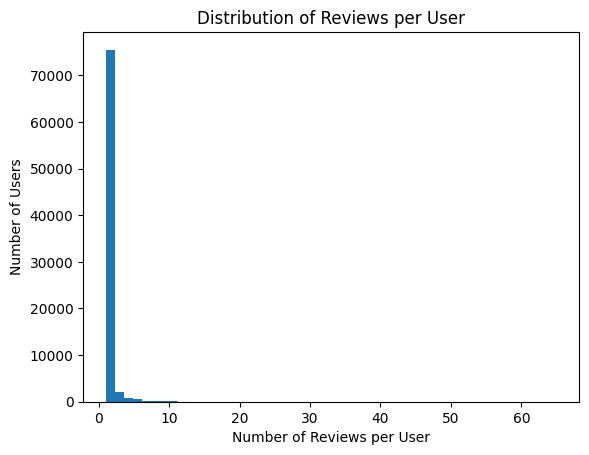

In [23]:
# ----------------- Your code here -----------------
user_review_counts = df['user_id'].value_counts()
print(user_review_counts)
plt.hist(user_review_counts, bins=50)
plt.xlabel('Number of Reviews per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Reviews per User')
plt.show()

สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

business_id
GBTPC53ZrG1ZBY3DT8Mbcw    950
PY9GRfzr4nTZeINf346QOw    460
W4ZEKkva9HpAdZG88juwyQ    433
vN6v8m4DO45Z4pp8yxxF_w    404
pSmOH4a3HNNpYM82J5ycLA    384
                         ... 
WofOgU_SBaIuerkGgtax4w      1
e911ksqo9xiQo6UYQ4iNkg      1
mYbEGFsRcA0tfUNSYcBJMA      1
7Qd7oc3g6Gj0MX03n1I6Og      1
WOiKRdX-sbnZPThSQi_tfw      1
Name: count, Length: 9973, dtype: int64


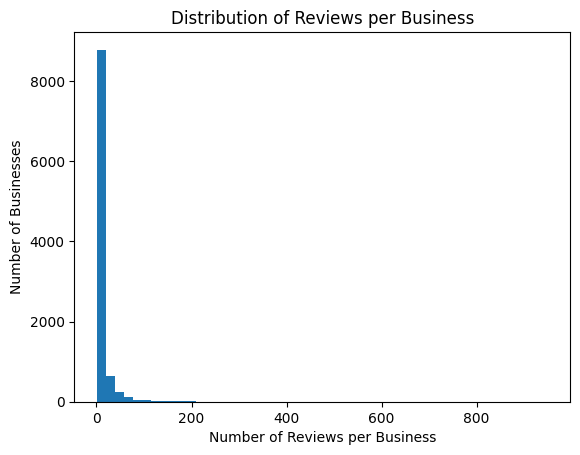

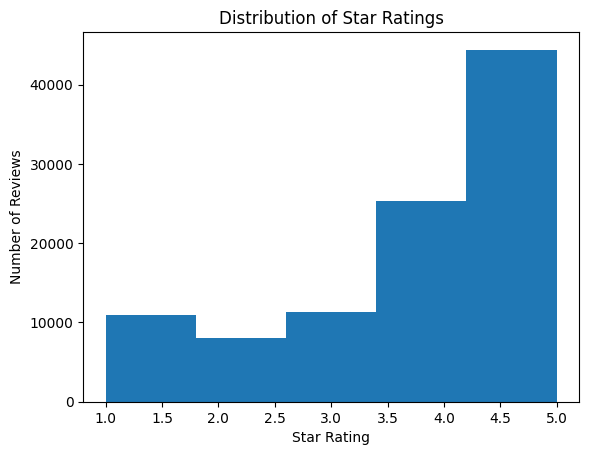

In [24]:
# ----------------- Your code here -----------------

# สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ
business_review_counts = df['business_id'].value_counts()
print(business_review_counts)
plt.hist(business_review_counts, bins=50)
plt.xlabel('Number of Reviews per Business')
plt.ylabel('Number of Businesses')
plt.title('Distribution of Reviews per Business')
plt.show()

# สำรวจการแจกแจงของจำนวนดาวที่แต่ละ business ได้รับ
plt.hist(df['stars_review'], bins=5)
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Star Ratings')
plt.show()

มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [25]:
# สร้าง dictionary เพื่อเก็บจำนวนของแต่ละหมวดหมู่ธุรกิจ
category_counts = {}

# วนซ้ำผ่านคอลัมน์ 'categories' และแยกหมวดหมู่ธุรกิจออกเป็นรายการย่อย
for categories in df['categories']:
    if isinstance(categories, str):
        # แยกหมวดหมู่ธุรกิจด้วย '; ' หรือสัญลักษณ์ที่ใช้
        category_list = categories.split('; ')
        for category in category_list:
            # ตรวจสอบว่าหมวดหมู่ธุรกิจอยู่ใน dictionary หรือไม่
            if category in category_counts:
                category_counts[category] += 1  # ถ้ามีอยู่แล้ว ให้เพิ่ม 1
            else:
                category_counts[category] = 1   # ถ้ายังไม่มี ให้กำหนดค่าเป็น 1

# แสดงผลลัพธ์
print(f"Number of business types: {len(category_counts)}")
print("Business type counts:")
# เรียงลำดับหมวดหมู่ตามจำนวนจากมากไปน้อย
for category, count in sorted(category_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{category}: {count}")

Streaming output truncated to the last 5000 lines.
Candy Stores, Specialty Food, Food: 9
Shopping, Electronics Repair, Local Services, IT Services & Computer Repair, Mobile Phone Repair, Mobile Phone Accessories, Mobile Phones: 9
Restaurants, Sandwiches, Caterers, Burgers, Salad, Event Planning & Services: 9
Beauty & Spas, Hair Salons, Hair Stylists, Barbers: 9
Restaurants, Cafeteria, Seafood, Comfort Food, Cajun/Creole, Chinese, Barbers, American (New), Beauty & Spas, Southern: 9
Restaurants, Indian, Buffets, Vegetarian, Seafood: 9
Restaurants, Food Delivery Services, Food, Pizza: 9
Bakeries, Donuts, Food, Delis, Restaurants, Coffee & Tea: 9
Nightlife, Pubs, Breakfast & Brunch, Bars, Burgers, British, Cocktail Bars, Restaurants: 9
Hot Dogs, Burgers, Restaurants, Canadian (New): 9
Nightlife, American (Traditional), Bars, Chicken Wings, Sports Bars, Restaurants: 9
Restaurants, Food, Fast Food, Coffee & Tea, Burgers: 9
American (Traditional), Restaurants, Breweries, Food: 9
Food, Chicken

In [26]:
# ----------------- Your code here -----------------
# สร้าง dictionary เพื่อเก็บจำนวนของแต่ละหมวดหมู่ธุรกิจ
category_counts = {}

# วนซ้ำผ่านคอลัมน์ 'categories' และแยกหมวดหมู่ธุรกิจออกเป็นรายการย่อย
for categories in df['categories']:
    if isinstance(categories, str):
        # แยกหมวดหมู่ธุรกิจด้วย '; ' หรือสัญลักษณ์ที่ใช้
        category_list = categories.split('; ')
        for category in category_list:
            # ตรวจสอบว่าหมวดหมู่ธุรกิจอยู่ใน dictionary หรือไม่
            if category in category_counts:
                category_counts[category] += 1  # ถ้ามีอยู่แล้ว ให้เพิ่ม 1
            else:
                category_counts[category] = 1   # ถ้ายังไม่มี ให้กำหนดค่าเป็น 1

# แสดงผลลัพธ์
print(f"Number of business types: {len(category_counts)}")
print("Business type counts:")
# เรียงลำดับหมวดหมู่ตามจำนวนจากมากไปน้อย
for category, count in sorted(category_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{category}: {count}")

Streaming output truncated to the last 5000 lines.
Candy Stores, Specialty Food, Food: 9
Shopping, Electronics Repair, Local Services, IT Services & Computer Repair, Mobile Phone Repair, Mobile Phone Accessories, Mobile Phones: 9
Restaurants, Sandwiches, Caterers, Burgers, Salad, Event Planning & Services: 9
Beauty & Spas, Hair Salons, Hair Stylists, Barbers: 9
Restaurants, Cafeteria, Seafood, Comfort Food, Cajun/Creole, Chinese, Barbers, American (New), Beauty & Spas, Southern: 9
Restaurants, Indian, Buffets, Vegetarian, Seafood: 9
Restaurants, Food Delivery Services, Food, Pizza: 9
Bakeries, Donuts, Food, Delis, Restaurants, Coffee & Tea: 9
Nightlife, Pubs, Breakfast & Brunch, Bars, Burgers, British, Cocktail Bars, Restaurants: 9
Hot Dogs, Burgers, Restaurants, Canadian (New): 9
Nightlife, American (Traditional), Bars, Chicken Wings, Sports Bars, Restaurants: 9
Restaurants, Food, Fast Food, Coffee & Tea, Burgers: 9
American (Traditional), Restaurants, Breweries, Food: 9
Food, Chicken

### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว

<ระบุจุดประสงค์ของการศึกษา>

In [27]:
# ----------------- Your code here -----------------
# Question: ธุรกิจหมวดหมู่ใดที่มีการเติบโตอย่างรวดเร็วในช่วงปีที่ผ่านมา?
# จุดประสงค์ของการศึกษา : วิเคราะห์ข้อมูลธุรกิจที่มีการเปิดใหม่หรือเพิ่มจำนวนในปีที่ผ่านมาว่าหมวดหมู่ใดมีการเติบโตสูงสุด

# แปลงคอลัมน์ 'date' ให้เป็นประเภท datetime
df['date'] = pd.to_datetime(df['date'])

# ดึงเฉพาะปีออกมาจากคอลัมน์ 'date'
df['year'] = df['date'].dt.year

# กำหนดปีที่ต้องการเปรียบเทียบ (เปลี่ยนปีตามที่ต้องการ)
current_year = df['year'].max()
previous_year = current_year - 1

# กรองข้อมูลธุรกิจที่มีรีวิวในปีก่อนหน้าและปีปัจจุบัน
df_current_year = df[df['year'] == current_year]
df_previous_year = df[df['year'] == previous_year]

# นับจำนวนรีวิวในแต่ละหมวดหมู่สำหรับปีปัจจุบัน
current_category_counts = {}
for categories in df_current_year['categories']:
    if isinstance(categories, str):
        category_list = categories.split('; ')
        for category in category_list:
            if category in current_category_counts:
                current_category_counts[category] += 1
            else:
                current_category_counts[category] = 1

# นับจำนวนรีวิวในแต่ละหมวดหมู่สำหรับปีก่อนหน้า
previous_category_counts = {}
for categories in df_previous_year['categories']:
    if isinstance(categories, str):
        category_list = categories.split('; ')
        for category in category_list:
            if category in previous_category_counts:
                previous_category_counts[category] += 1
            else:
                previous_category_counts[category] = 1

# คำนวณการเติบโตของแต่ละหมวดหมู่
growth_data = []
for category in current_category_counts:
    current_count = current_category_counts.get(category, 0)
    previous_count = previous_category_counts.get(category, 0)
    growth = current_count - previous_count
    growth_data.append((category, growth))

# แปลงข้อมูลเป็น DataFrame เพื่อสะดวกในการจัดการ
growth_df = pd.DataFrame(growth_data, columns=['Category', 'Growth'])

# แปลงคอลัมน์ 'Growth' เป็นชนิดข้อมูลตัวเลข (float)
growth_df['Growth'] = pd.to_numeric(growth_df['Growth'], errors='coerce')

# ตรวจสอบคอลัมน์ 'Growth' เพื่อให้แน่ใจว่าไม่มีค่าที่ไม่สามารถแปลงเป็นตัวเลข
print(growth_df['Growth'].dtype)

# เรียงลำดับหมวดหมู่ตามการเติบโตสูงสุด
top_growth_categories = growth_df.nlargest(10, 'Growth')

print("Top 10 Business Categories by Growth from {} to {}:".format(previous_year, current_year))
print(top_growth_categories)


int64
Top 10 Business Categories by Growth from 2017 to 2018:
                                               Category  Growth
98    American (New), Restaurants, American (Traditi...      79
287       Noodles, Japanese, Diners, Restaurants, Ramen      47
1419  Bars, Nightlife, Restaurants, Music Venues, Am...      30
348   Restaurants, Cajun/Creole, American (New), Sea...      29
275   New Mexican Cuisine, Mexican, Tex-Mex, Tacos, ...      27
1317  Seafood, Venues & Event Spaces, Cocktail Bars,...      27
710   Active Life, Beer Gardens, Grocery, Middle Eas...      25
598   Burgers, Nightlife, Cajun/Creole, Bars, Restau...      23
95                   Restaurants, Cajun/Creole, Seafood      22
145   Restaurants, American (New), Breakfast & Brunc...      22


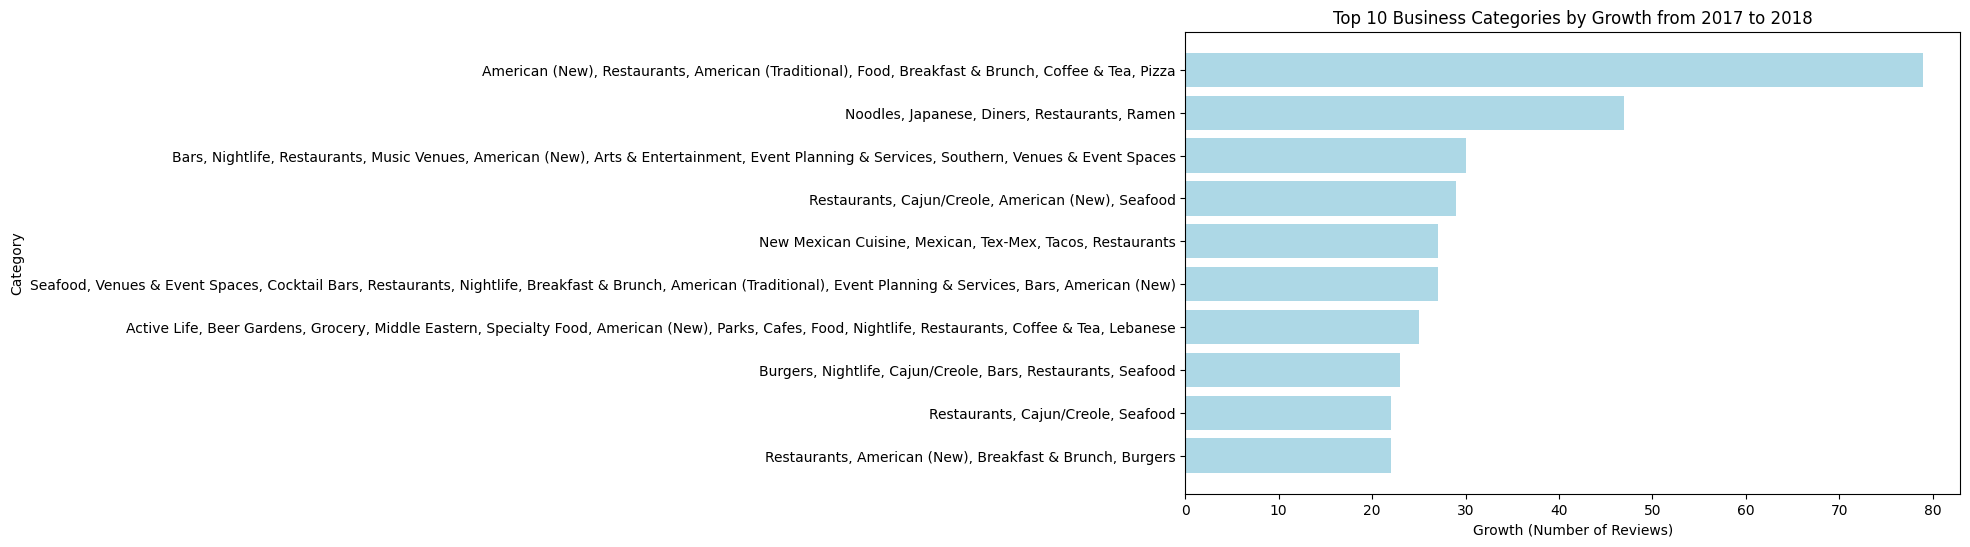

In [28]:
#----------------------------------------------
# Your code starts here
# create some data visualization for the analysis and your presentation

# สร้างกราฟแท่งแสดงการเติบโตของธุรกิจในแต่ละหมวดหมู่
plt.figure(figsize=(10,6))
plt.barh(top_growth_categories['Category'], top_growth_categories['Growth'], color='lightblue')
plt.xlabel('Growth (Number of Reviews)')
plt.ylabel('Category')
plt.title(f'Top 10 Business Categories by Growth from {previous_year} to {current_year}')
plt.gca().invert_yaxis()  # สลับลำดับเพื่อให้หมวดหมู่ที่เติบโตมากสุดอยู่ด้านบน
plt.show()


## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว

In [32]:
import urllib.request
from bs4 import BeautifulSoup
import json

# กำหนด URL ของแหล่งข้อมูลที่เกี่ยวข้องกับหนังไทย
urls = [
    'https://www.sanook.com/movie/163287/',
    'https://entertainment.trueid.net/detail/jgd8Z9wxB3Jg',
    'https://www.springnews.co.th/lifestyle/movie-series/846475',
    'https://board.postjung.com/1509943',
    'https://www.springnews.co.th/news/infographic/844406',
    'https://entertainment.trueid.net/detail/j47x7GweBBaD',
    'https://www.thairath.co.th/lifestyle/life/2744803',
    'https://movie.kapook.com/view276293.html',
    'https://entertainment.trueid.net/detail/j47x7GweBBaD',
    'https://droidsans.com/10-movies-and-series-most-watch-in-thailand/'
    ]

# ฟังก์ชันสำหรับดึงข้อมูลจาก URL
def fetch_data(url):
    try:
        with urllib.request.urlopen(url) as response:
            html = response.read()
            soup = BeautifulSoup(html, 'html.parser')
            # แก้ไขการดึงข้อมูลตามโครงสร้าง HTML ของเว็บไซต์
            data = {
                'title': soup.title.string if soup.title else 'No Title',
                'content': soup.get_text()
            }
            return data
    except Exception as e:
        print(f"Error fetching data from {url}: {e}")
        return None

# รวบรวมข้อมูลจากทุก URL
def collect_data(urls):
    all_data = []
    for url in urls:
        data = fetch_data(url)
        if data is not None:
            all_data.append(data)
    return all_data

# เรียกใช้ฟังก์ชันและรวบรวมข้อมูล
collected_data = collect_data(urls)

# บันทึกข้อมูลรวมลงในไฟล์ (ถ้าต้องการ)
with open("thai_movies_data.json", "w") as file:
    json.dump(collected_data, file, indent=4)

print("Data collection and merging complete.")

Data collection and merging complete.


In [33]:
print(collected_data)

[{'title': '"ลอง ลีฟ เลิฟว์!" คว้ารางวัล "ภาพยนตร์ไทยที่สุดแห่งปี" สนุกสุดจัด 2023 ', 'content': '"ลอง ลีฟ เลิฟว์!" คว้ารางวัล "ภาพยนตร์ไทยที่สุดแห่งปี" สนุกสุดจัด 2023 ข่าว ดูดวง เพลง Joox หวย ผลบอล ดูทีวีออนไลน์ เกมตรวจหวยWeTVเล่นเกมส์หน้าแรกเรื่องฮอตข่าวข่าวบันเทิงกีฬารถยนต์ไอทีดูดวงวัยรุ่นไลฟ์สไตล์เศรษฐกิจคลิปข่าวเรื่องฮอต ข่าว ข่าวบันเทิง ข่าวกีฬา ข่าวเศรษฐกิจ ดูดวง - ตรวจหวยดูดวง หวยไทยสถิติหวยไทยหวยลาว ไลฟ์สไตล์ผู้หญิง ผู้ชาย วัยรุ่น ไอที รถยนต์ สุขภาพ เที่ยว-กิน Sanook Choice บันเทิงครบรสหนัง-ละคร เพลง เกมส์ คลิป พอดแคสต์ ดูทีวีดู WeTVความรู้รอบตัวพจนานุกรม ฮาวทู กูรู-รอบรู้แนะนำติชม แจ้งปัญหาการใช้งานร่วมงานกับเราติดตาม สนุกร้องเรียนเนื้อหาไม่เหมาะสมสงวนลิขสิทธิ์ © 2567 บริษัท เทนเซ็นต์ (ประเทศไทย) จำกัดหนัง-ละครหนังละคร - ซีรีส์รายการทีวีแกลเลอรีเนื้อหาทั้งหมดดูทีวีออนไลน์"ลอง ลีฟ เลิฟว์!" คว้ารางวัล "ภาพยนตร์ไทยที่สุดแห่งปี" สนุกสุดจัด 202301 ก.พ. 67 (10:00 น.) พิมพ์แชร์เรื่องนี้แชร์เรื่องนี้LineTwitterFacebookคัดลอกลิงก์- กก +ลอง ลีฟ เลิฟว์! สุดปังโดนใจคอหนังคว้ารางวัล "ภาพ

เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [34]:
#----------------------------------------------
# Your code starts here

# Create a list to store the lowercased content
lowercased_content = []

# Loop through the collected data
for data in collected_data:
    if data is not None:
        # Lowercase the content
        lowercased_content.append(data['content'].lower())

# Print the lowercased content
print(lowercased_content)


['"ลอง ลีฟ เลิฟว์!" คว้ารางวัล "ภาพยนตร์ไทยที่สุดแห่งปี" สนุกสุดจัด 2023 ข่าว ดูดวง เพลง joox หวย ผลบอล ดูทีวีออนไลน์ เกมตรวจหวยwetvเล่นเกมส์หน้าแรกเรื่องฮอตข่าวข่าวบันเทิงกีฬารถยนต์ไอทีดูดวงวัยรุ่นไลฟ์สไตล์เศรษฐกิจคลิปข่าวเรื่องฮอต ข่าว ข่าวบันเทิง ข่าวกีฬา ข่าวเศรษฐกิจ ดูดวง - ตรวจหวยดูดวง หวยไทยสถิติหวยไทยหวยลาว ไลฟ์สไตล์ผู้หญิง ผู้ชาย วัยรุ่น ไอที รถยนต์ สุขภาพ เที่ยว-กิน sanook choice บันเทิงครบรสหนัง-ละคร เพลง เกมส์ คลิป พอดแคสต์ ดูทีวีดู wetvความรู้รอบตัวพจนานุกรม ฮาวทู กูรู-รอบรู้แนะนำติชม แจ้งปัญหาการใช้งานร่วมงานกับเราติดตาม สนุกร้องเรียนเนื้อหาไม่เหมาะสมสงวนลิขสิทธิ์ © 2567 บริษัท เทนเซ็นต์ (ประเทศไทย) จำกัดหนัง-ละครหนังละคร - ซีรีส์รายการทีวีแกลเลอรีเนื้อหาทั้งหมดดูทีวีออนไลน์"ลอง ลีฟ เลิฟว์!" คว้ารางวัล "ภาพยนตร์ไทยที่สุดแห่งปี" สนุกสุดจัด 202301 ก.พ. 67 (10:00 น.) พิมพ์แชร์เรื่องนี้แชร์เรื่องนี้linetwitterfacebookคัดลอกลิงก์- กก +ลอง ลีฟ เลิฟว์! สุดปังโดนใจคอหนังคว้ารางวัล "ภาพยนตร์ไทยที่สุดแห่งปี" จากกิจกรรมโหวตสนุกสุดจัด 2023\xa0\nลอง ลีฟ เลิฟว์! เป็นหนังรักที่โดนใจคนดู

In [35]:
!pip install pythainlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 50.6 MB/s eta 0:00:00


Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

In [36]:
#----------------------------------------------
# Your code starts here
# Combine all the content into a single string
all_content = " ".join(lowercased_content)

# Define the keywords to search for
keywords = ["ลอง ลีฟ เลิฟว์!", "ขุนพันธ์", "ธี่หยด", "4king", "สัปเหร่อ"]

# Create a dictionary to store the counts
keyword_counts = {keyword: all_content.count(keyword) for keyword in keywords}

# Print the counts
print(keyword_counts)

{'ลอง ลีฟ เลิฟว์!': 6, 'ขุนพันธ์': 18, 'ธี่หยด': 27, '4king': 13, 'สัปเหร่อ': 41}


In [37]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [38]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [39]:
# สมมติว่ามีข้อมูลที่จัดเก็บใน DataFrame
import plotly.express as px
import pandas as pd

data = pd.DataFrame({
    'Movies': list(keyword_counts.keys()),
    'Frequency': list(keyword_counts.values())
})
data = data.nlargest(10, 'Frequency')
# สร้างกราฟแท่ง
fig = px.bar(data,
             x='Movies',
             y='Frequency',
             title='Movies Frequency in Thai Movies')

# แสดงกราฟ
fig.show()

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **